The purpose of this notebook is to illustrate how to choose binning quantiles. We see that the column integrated QT residuals on which we are binning are very spread out. Each bin needs to be small enough such a single linear model can capture a linear relationship between the inputs and the residuals within the bin. However, the bins also need to be large enough to have a significant chance of being transitioned to. The function "optimize_binning_quantiles" minimizes the bin-sized averaged within-bin variance for a specified number of bins defined by:

$$\sum_{bin}{var(bin_i) * len({bin_i})}$$

The optimizer finds the binning quantiles that make it so each bin has a relatively small amount of variance, but relatively large size. So large bins will occur in the areas with little variance and visa versa. 

The number of bins to use remains to be decided. Too many bins will make it so each bin does not have enough training data; too few bins will make it so extreme values cannot be captured. 

In [1]:
from uwnet.stochastic_parameterization.utils import (
    get_dataset,
)
dir_ = '/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/'
base_model_location = dir_ + 'full_model/1.pkl'
ds_location = dir_ + 'training.nc'
data = get_dataset(
    t_start=400, 
    t_stop=500,
    base_model_location=base_model_location,
    ds_location=ds_location, 
    binning_quantiles=(1,)
).column_integrated_qt_residuals.values.ravel()

In [2]:
from scipy.stats import gaussian_kde
from uwnet.stochastic_parameterization.choose_bins import optimize_binning_quantiles
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

def plot_optimal_bins(n_bins):
    binning_quantiles = optimize_binning_quantiles(n_bins, verbose=False)
    print(f'Binning Quantiles: {np.round(binning_quantiles, 4)}')
    ax = plt.axes()
    p = gaussian_kde(data)
    lower_percentile=0.001
    upper_percentile=99.999
    p1 = np.percentile(data, lower_percentile)
    p2 = np.percentile(data, upper_percentile)
    xx = np.linspace(p1, p2, 100)
    y = np.log(p(xx))
    ax.plot(xx, y)
    ax.set_xlim([p1, p2])
    bin_values = [np.quantile(data, quantile) for quantile in binning_quantiles]
    for bin_value in bin_values:
        plt.axvline(x=bin_value)
    plt.title(f'Optimal {n_bins} bins superimposed on column integrated QT residuals')
    plt.ylabel('Log Density')
    plt.xlabel('Column Integrated QT Residual')
    plt.show()

Binning Quantiles: [0.0267 0.3683 0.8695 1.    ]


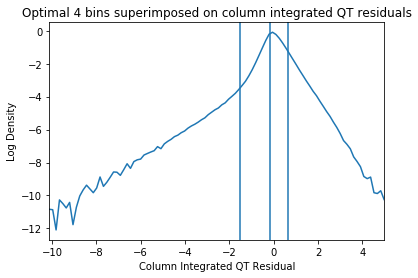

Binning Quantiles: [0.0073 0.0557 0.3024 0.5967 0.8348 0.9666 1.    ]


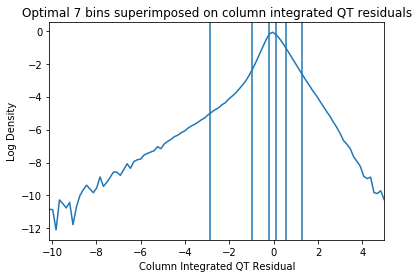

Binning Quantiles: [0.0072 0.0499 0.2326 0.3327 0.4166 0.5001 0.5836 0.6672 0.7519 0.8499
 0.9667 1.    ]


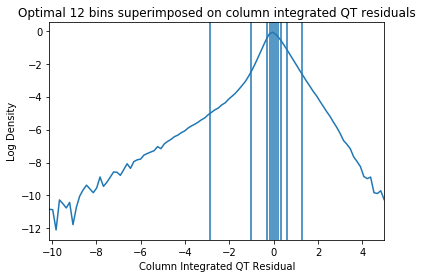

Binning Quantiles: [0.0066 0.0337 0.1228 0.1986 0.2498 0.2999 0.35   0.4    0.45   0.5
 0.55   0.6    0.6501 0.7001 0.7502 0.8003 0.8511 0.9101 0.9795 1.    ]


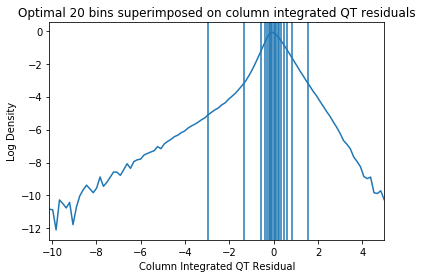

Binning Quantiles: [0.0056 0.0271 0.0693 0.0997 0.1249 0.15   0.175  0.2    0.225  0.25
 0.275  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5
 0.525  0.55   0.575  0.6    0.625  0.65   0.675  0.7    0.725  0.75
 0.775  0.8    0.825  0.85   0.875  0.9001 0.9251 0.9508 0.9821 1.    ]


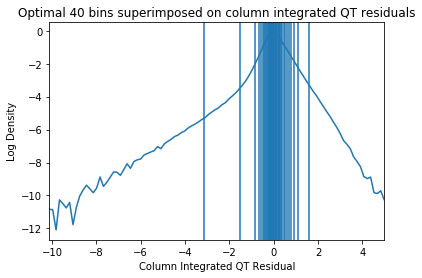

In [3]:
plot_optimal_bins(4)
plot_optimal_bins(7)
plot_optimal_bins(12)
plot_optimal_bins(20)
plot_optimal_bins(40)